In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Syneromics plots

In [9]:
synergies = pd.read_csv("only_pc_results/syn_results/final_results.tsv", sep='\t')

In [3]:
synergies.snps.drop_duplicates()

0                       P10644*Q9NYF8
1                       Q14677*Q8NEY8
2                       P50336*Q14677
3                       P50336*Q9UKV5
4                       Q08752*Q6NUK1
                     ...             
824822    O43159*Q9BUH6*Q9UBI6*Q92785
824823    P29992*P50336*Q92667*Q96JQ2
824824    O60271*O94880*P09758*Q9BVV7
824825    O00754*P62316*Q9BT09*Q9BXJ9
824826    P07942*P52272*Q13685*Q9NY27
Name: snps, Length: 742466, dtype: object

In [8]:
synergies

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug,p_fdr
0,Pbagee:QjNYFi,0.256486,0.113,2.273635,0.023328,0.034953,0.478019,625,0.009699,1,P10644*Q9NYF8,2,CHEMBL109480,1
19,Qbcjfj:QjgTcd,-0.271522,0.103,-2.648542,0.008289,-0.472845,-0.070199,625,0.023346,1,Q12959*Q96T23,2,CHEMBL109480,1
45,Pffhdf:Qbfeci,0.231420,0.276,0.837970,0.402370,-0.310914,0.773754,625,0.003885,1,P55735*Q15428,2,CHEMBL109480,1
72,Pfbbei:Qbcjfj,0.213529,0.094,2.274629,0.023268,0.029180,0.397879,625,0.010724,1,P51148*Q12959,2,CHEMBL109480,1
76,Pdabab:Pgchfd,0.438490,0.192,2.283092,0.022762,0.061325,0.815656,625,0.041594,1,P30101*P62753,2,CHEMBL109480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824412,Pejjbg:QjgSTd,-0.206870,0.086,-2.418581,0.015865,-0.374838,-0.038902,630,0.076579,1,P49916*Q96ST3,2,CHEMBL98,1
824424,Ojgaai:QjUMSe,0.229211,0.198,1.159848,0.246553,-0.158870,0.617292,630,0.038645,1,O96008*Q9UMS4,2,CHEMBL98,1
824438,Obfeeg:Phieag,0.258177,0.117,2.213038,0.027255,0.029081,0.487273,630,0.049912,1,O15446*P78406,2,CHEMBL98,1
824472,Pejhjc:Pgbaaj,-0.318412,0.086,-3.706905,0.000228,-0.487093,-0.149731,630,0.056462,1,P49792*P61009,2,CHEMBL98,1


In [13]:
from  statsmodels.stats.multitest import multipletests
synergies.loc[:,'p_fdr'] = 1  
correction = 'fdr_bh'

f = 0.2
synergies = synergies[np.abs(synergies.coef) > f]

# do the correction per order
for d in synergies.drug.unique():
    for o in range(2,5):
        if synergies[(synergies.order == o) & (synergies.drug == d)].shape[0] == 0: continue
        synergies.loc[(synergies.order == o) & (synergies.drug == d), 'p_fdr'] = multipletests(synergies.loc[(synergies.order == o) & (synergies.drug == d),'P>|z|'], method=correction)[1]
synergies.head()

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug,p_fdr
0,Pbagee:QjNYFi,0.256486,0.113,2.273635,0.023328,0.034953,0.478019,625,0.009699,True,P10644*Q9NYF8,2,CHEMBL109480,0.057727
19,Qbcjfj:QjgTcd,-0.271522,0.103,-2.648542,0.008289,-0.472845,-0.070199,625,0.023346,True,Q12959*Q96T23,2,CHEMBL109480,0.032284
45,Pffhdf:Qbfeci,0.231420,0.276,0.837970,0.402370,-0.310914,0.773754,625,0.003885,True,P55735*Q15428,2,CHEMBL109480,0.413572
72,Pfbbei:Qbcjfj,0.213529,0.094,2.274629,0.023268,0.029180,0.397879,625,0.010724,True,P51148*Q12959,2,CHEMBL109480,0.057727
76,Pdabab:Pgchfd,0.438490,0.192,2.283092,0.022762,0.061325,0.815656,625,0.041594,True,P30101*P62753,2,CHEMBL109480,0.057402


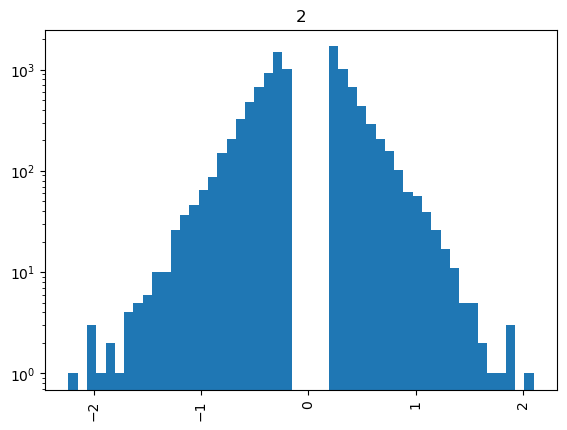

In [14]:
synergies.loc[:,'coef_abs'] = np.abs(synergies.coef)
synergies.loc[:,'coef_p'] = synergies.coef.abs().divide(synergies.p_fdr).mul(synergies.order)
synergies[synergies.p_fdr < 0.05].hist('coef', by='order', bins=50, log=True)
plt.show()

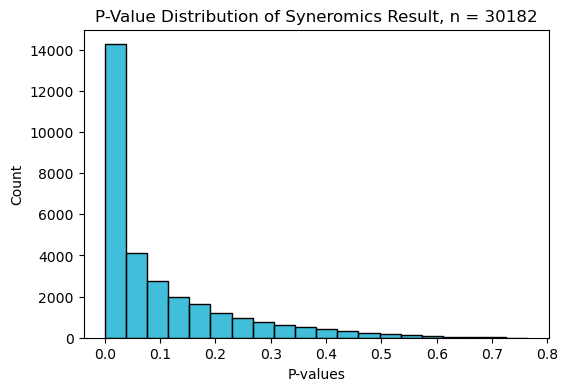

In [15]:
plt.rcParams['figure.figsize']=(6,4)
hist = sns.histplot(synergies, x='P>|z|', bins=20, color='#00A9CE')
hist.set(xlabel="P-values", title=f"P-Value Distribution of Syneromics Result, n = {len(synergies.coef_id)}")
# plt.savefig('img/p-value.png')
plt.show()

In [16]:
sum(synergies['P>|z|'] == 0.0)

0

In [27]:
del synergies

### Explainability plots

In [17]:
models = pd.read_csv("only_pc_results/exp_results/combined_models.tsv", sep='\t')

In [18]:
models

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,pearsonR,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins
0,Intercept,9.977637,14.509,0.687703,0.492924,-18.739027,38.694300,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Intercept
1,Pbfffj,-0.115312,0.027,-4.228742,0.000045,-0.169285,-0.061340,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,P15559
2,QjBPUg,-0.034145,0.079,-0.431518,0.666841,-0.190759,0.122470,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q9BPU6
3,Qbfbej,-0.048799,0.205,-0.237923,0.812333,-0.454759,0.357160,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q15149
4,Qbebje,-0.011199,0.058,-0.193333,0.847015,-0.125851,0.103453,625,0.894550,0.469350,...,0.282587,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q14194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65216,QhLeIc,0.029670,0.016,1.883451,0.310729,-0.170492,0.229832,630,0.999893,0.932761,...,0.261133,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,Q7L4I2
65217,QiIXQe,0.037843,0.015,2.452773,0.246453,-0.158195,0.233881,630,0.999893,0.932761,...,0.261133,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,Q8IXQ4
65218,QjHcDg,0.069665,0.014,5.153071,0.122025,-0.102111,0.241440,630,0.999893,0.932761,...,0.261133,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,Q9H2D6
65219,Ojehgd,0.015134,0.012,1.303822,0.416526,-0.132349,0.162616,630,0.999893,0.932761,...,0.261133,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,O94763


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

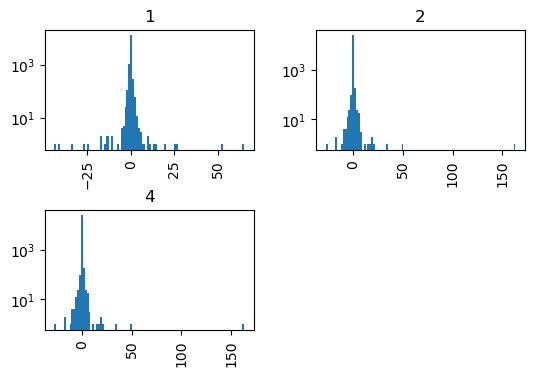

In [19]:
models.hist('coef', bins=100, log='True', by='order')

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

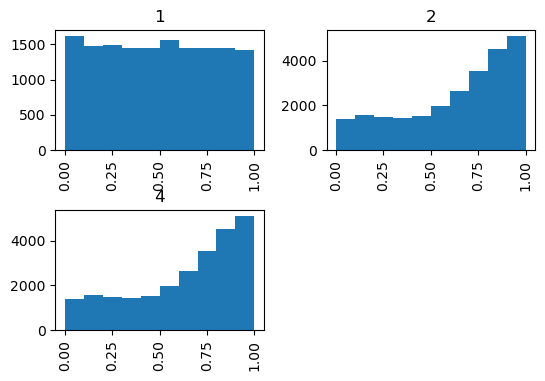

In [20]:
models[models.coef_id != 'Intercept'].hist('P>|z|', bins=10, by='order')

In [21]:
from  statsmodels.stats.multitest import multipletests
models['p_fdr'] = 10
correction = 'fdr_bh'

# do the correction per order
for d in models.drug.unique():
    for c in models.config.unique():
        for o in range(1,5):
            if models[(models.order == o) & (models.drug == d) & (models.config == c)].shape[0] == 0: continue
            models.loc[(models.order == o) & (models.drug == d) & (models.config == c), 'p_fdr'] = multipletests(models['P>|z|'][(models.order == o) & (models.drug == d) & (models.config == c)], method=correction)[1]
models.head()

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins,p_fdr
0,Intercept,9.977637,14.509,0.687703,0.492924,-18.739027,38.694300,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Intercept,0.953534
1,Pbfffj,-0.115312,0.027,-4.228742,0.000045,-0.169285,-0.061340,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,P15559,0.022659
2,QjBPUg,-0.034145,0.079,-0.431518,0.666841,-0.190759,0.122470,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q9BPU6,0.953534
3,Qbfbej,-0.048799,0.205,-0.237923,0.812333,-0.454759,0.357160,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q15149,0.960862
4,Qbebje,-0.011199,0.058,-0.193333,0.847015,-0.125851,0.103453,625,0.89455,0.46935,...,1,CHEMBL109480,500,625,500,0,normal,a: 0.05 f: 0.2,Q14194,0.964442


In [22]:
models[(models.p_fdr < 0.05) & (models.coef_id.str.contains(':'))]

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins,p_fdr
30488,Pdfgfi:QjHdNb,0.491988,0.148,3.333474,0.002674,0.188020,0.795956,623,0.990831,0.771881,...,2,CHEMBL325041,500,623,597,97,normal,a: 0.05 f: 0.2,P35658:Q9H3N1+P35658:Q9H3N1,0.049396
31086,Pdfgfi:QjHdNb,0.491988,0.148,3.333474,0.002674,0.188020,0.795956,623,0.990831,0.771881,...,4,CHEMBL325041,500,623,597,97,normal,a: 0.05 f: 0.2,P35658:Q9H3N1+P35658:Q9H3N1,0.049396
37345,Pafacd:QjgHYg,-0.039331,0.001,-66.664770,0.009549,-0.046827,-0.031834,624,1.000000,0.999762,...,2,CHEMBL417,500,624,872,372,normal,a: 0.05 f: 0.2,P05023:Q96HY6+P05023:Q96HY6,0.036418
37346,Pajabc:QjgIce,-0.038593,0.002,-21.296490,0.029871,-0.061619,-0.015567,624,1.000000,0.999762,...,2,CHEMBL417,500,624,872,372,normal,a: 0.05 f: 0.2,P09012:Q96I24+P09012:Q96I24,0.045217
37348,Pejfij:Qjcgcb,0.014676,0.000,46.707334,0.013628,0.010684,0.018669,624,1.000000,0.999762,...,2,CHEMBL417,500,624,872,372,normal,a: 0.05 f: 0.2,P49589:Q92621+P49589:Q92621,0.036418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38583,Pgcicj:Pgdcai,0.038400,0.002,20.215694,0.031466,0.014264,0.062536,624,1.000000,0.999762,...,4,CHEMBL417,500,624,872,372,normal,a: 0.05 f: 0.2,P62829:P63208+P62829:P63208,0.046876
38584,Pajbba:Pgdbhd,0.023108,0.000,79.496489,0.008008,0.019415,0.026802,624,1.000000,0.999762,...,4,CHEMBL417,500,624,872,372,normal,a: 0.05 f: 0.2,P09110:P63173+P09110:P63173,0.036418
38585,QiWWYd:Qjjejg,-0.077786,0.002,-48.693119,0.013072,-0.098084,-0.057488,624,1.000000,0.999762,...,4,CHEMBL417,500,624,872,372,normal,a: 0.05 f: 0.2,Q8WWY3:Q99496+Q8WWY3:Q99496,0.036418
38586,Pahcdh:Pehjbe,-0.123213,0.002,-69.397911,0.009173,-0.145772,-0.100654,624,1.000000,0.999762,...,4,CHEMBL417,500,624,872,372,normal,a: 0.05 f: 0.2,P07237:P47914+P07237:P47914,0.036418


array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

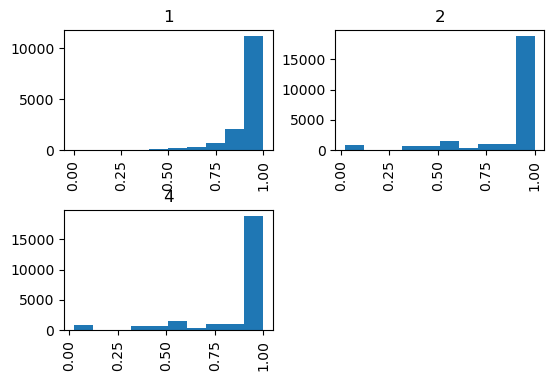

In [23]:
models.hist('p_fdr', by='order')

<Axes: >

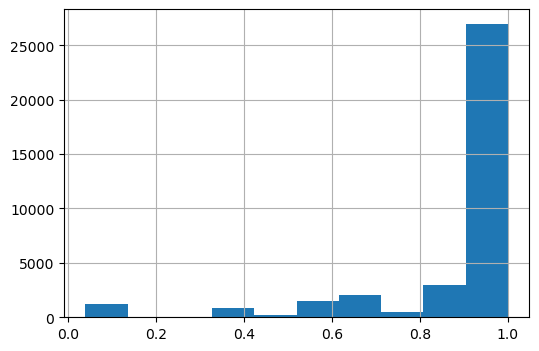

In [16]:
models[models.coef_id.str.contains(':')].p_fdr.hist()

In [17]:
syn_mask = models.coef_id.str.contains(':')

In [18]:
synergies = models[syn_mask]
synergies = synergies[synergies.order == 4]
synergies.config.value_counts()

a: 0.05 f: 0.1    18111
Name: config, dtype: int64

In [19]:
n = synergies.config.value_counts()

In [25]:
csiro_palette = ['#00B0F0', '#00A9CE', '#007377', '#1E22AA', '#6D2077']

sns.set_palette(palette=csiro_palette)

In [26]:
model_4 = models[models.order ==4]

In [27]:
model_4[model_4.coef_id.str.contains(':')]

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,train_pseudo_r2,train_adj_r2,...,order,drug,n_prot,n_obs,n_feat,n_syn,fit,config,Proteins,p_fdr
1339,Pbbacb:QjNPAi,0.017428,0.047,0.368950,0.774983,-0.582772,0.617628,625,0.998132,-0.165590,...,4,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,P11021:Q9NPA8+P11021:Q9NPA8,0.999994
1340,Pgcdag:Qbdbei,-0.014725,0.063,-0.233901,0.853724,-0.814643,0.785193,625,0.998132,-0.165590,...,4,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,P62306:Q13148+P62306:Q13148,0.999994
1341,QigVib:QjYcWc,-0.037430,0.053,-0.699704,0.611326,-0.717145,0.642284,625,0.998132,-0.165590,...,4,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,Q86V81:Q9Y2W2+Q86V81:Q9Y2W2,0.999994
1342,Qbfefj:Qjcfca,0.009033,0.062,0.144699,0.908516,-0.784174,0.802240,625,0.998132,-0.165590,...,4,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,Q15459:Q92520+Q15459:Q92520,0.999994
1343,Oedbhc:Qbecfh,0.001596,0.061,0.026331,0.983241,-0.768796,0.771989,625,0.998132,-0.165590,...,4,CHEMBL109480,500,625,836,336,normal,a: 0.05 f: 0.2,O43172:Q14257+O43172:Q14257,0.999994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64716,Pdjacd:QjBPWi,-0.002225,0.011,-0.198345,0.875347,-0.144731,0.140282,630,0.999893,0.932761,...,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,P39023:Q9BPW8+P39023:Q9BPW8,0.920923
64717,Pdaaee:QjgHYg,-0.011927,0.008,-1.521938,0.370080,-0.111503,0.087648,630,0.999893,0.932761,...,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,P30044:Q96HY6+P30044:Q96HY6,0.600823
64718,Ohfeje:Pdgffb,-0.070182,0.014,-5.097424,0.123324,-0.245122,0.104758,630,0.999893,0.932761,...,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,O75494:P36551+O75494:P36551,0.573605
64719,Ojfcdc:QiNFHe,0.003098,0.009,0.358869,0.780650,-0.106595,0.112792,630,0.999893,0.932761,...,4,CHEMBL98,500,630,897,397,normal,a: 0.05 f: 0.2,O95232:Q8NFH4+O95232:Q8NFH4,0.868679


NameError: name 'n' is not defined

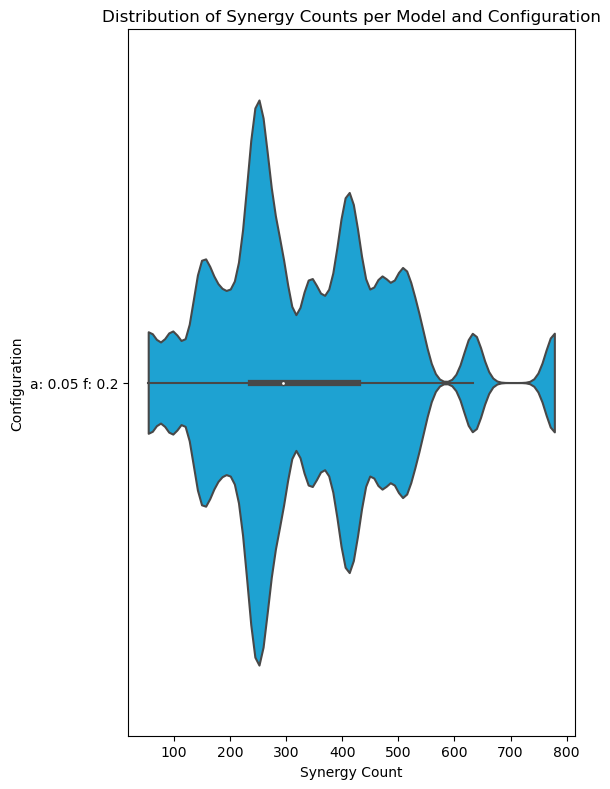

In [28]:
plt.rcParams['figure.figsize']=(6,8)
plt.rcParams['figure.autolayout'] = True

plot = sns.violinplot(model_4[["drug","n_syn","config"]].drop_duplicates(), x="n_syn", y="config",orient="h", cut=0, scale="width", bw=0.1)
plot.set_title("Distribution of Synergy Counts per Model and Configuration")
plot.set(xlabel="Synergy Count", ylabel="Configuration")
plot.set_yticks(range(len(n)))
# plot.set_yticklabels([f'alpha: 0.05 \n filter: 0 \n n = {n[0]}', f'alpha: 0.05 \n filter: 0.5 \n n = {n[2]}', f'alpha: 0.01 \n filter: 0 \n n = {n[1]}', f'alpha: 0.01 \n filter: 0.5 \n n = {n[3]}'])
# plt.savefig('img/synergy_count.png')
plt.show()

In [29]:
len(set(models.drug))

31

In [30]:
models.drug.value_counts()

CHEMBL2103875    3059
CHEMBL553025     2769
CHEMBL202721     2575
CHEMBL1614701    2523
CHEMBL92         2513
CHEMBL414804     2451
CHEMBL34259      2433
CHEMBL601719     2371
CHEMBL888        2347
CHEMBL1231160    2321
CHEMBL185        2317
CHEMBL98         2297
CHEMBL417        2247
CHEMBL428647     2193
CHEMBL109480     2175
CHEMBL554        2091
CHEMBL553        2045
CHEMBL288441     2015
CHEMBL1879463    2015
CHEMBL1173655    2013
CHEMBL83         1989
CHEMBL191334     1977
CHEMBL1336       1977
CHEMBL1351       1929
CHEMBL939        1883
CHEMBL603469     1841
CHEMBL3137336    1799
CHEMBL64925      1793
CHEMBL325041     1697
CHEMBL1201182    1224
CHEMBL413         342
Name: drug, dtype: int64

In [24]:
del models

In [31]:
performance = pd.read_csv("only_pc_results/exp_results/combined_performances.tsv", sep='\t')

In [32]:
performance[performance.drug == 'CHEMBL109480']

,train_pseudo_r2,train_adj_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,order,n_prot,n_obs,n_feat,n_syn,config,fit
0,0.894550,0.46935,0.340452,9.987907,0.945807,0.282587,CHEMBL109480,1,500,625,500,0,a: 0.05 f: 0.2,normal
1,0.998132,-0.16559,0.006031,11.108502,0.999066,0.161242,CHEMBL109480,2,500,625,836,336,a: 0.05 f: 0.2,normal
2,0.998132,-0.16559,0.006031,11.108502,0.999066,0.161242,CHEMBL109480,4,500,625,836,336,a: 0.05 f: 0.2,normal


In [33]:
plt.rcParams['figure.figsize']=(6,5)

<Axes: >

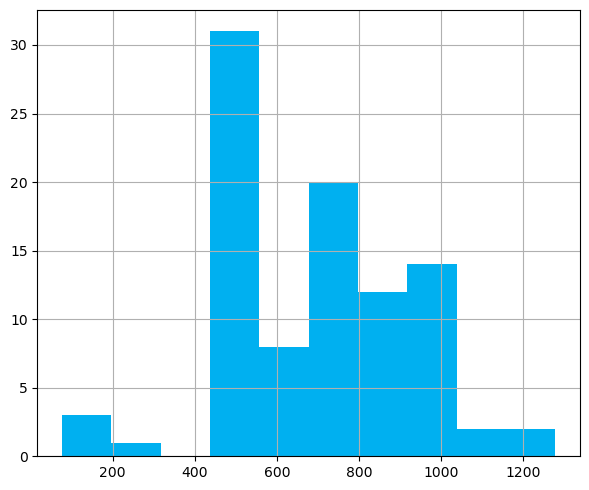

In [34]:
performance.n_feat.hist()

<Axes: xlabel='n_feat', ylabel='pearsonR'>

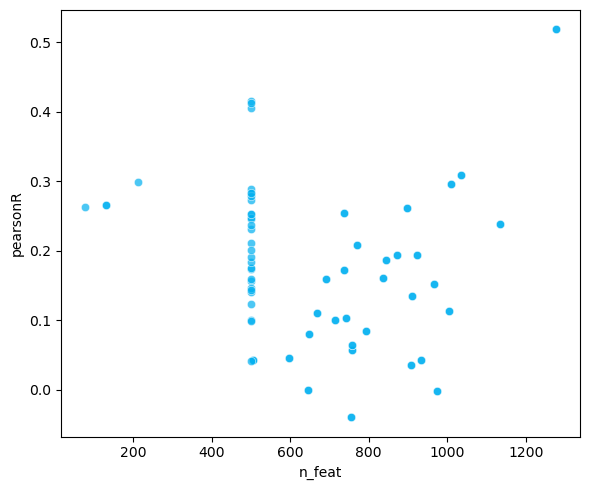

In [35]:
sns.scatterplot(performance, x='n_feat', y='pearsonR' , alpha=0.7)

In [31]:
performance[["config", "order"]].value_counts()

config          order
a: 0.05 f: 0.1  1        31
                2        31
                4        31
dtype: int64

In [32]:
n = performance.config.value_counts()

In [33]:
no_nan = performance.dropna()
no_nan

,train_pseudo_r2,train_adj_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,order,n_prot,n_obs,n_feat,n_syn,config,fit
0,0.894550,0.469350,0.340452,9.987907,0.945807,0.282587,CHEMBL109480,1,500,625,500,0,a: 0.05 f: 0.1,normal
1,0.998132,-0.165590,0.006031,8.751660,0.999066,0.246788,CHEMBL109480,2,500,625,1156,656,a: 0.05 f: 0.1,normal
2,0.998132,-0.165590,0.006031,8.751660,0.999066,0.246788,CHEMBL109480,4,500,625,1156,656,a: 0.05 f: 0.1,normal
3,0.886403,0.446103,0.311270,7.311705,0.941490,0.156340,CHEMBL1173655,1,500,630,500,0,a: 0.05 f: 0.1,normal
4,0.995997,-1.517813,0.010968,10.015324,0.997997,0.079092,CHEMBL1173655,2,500,630,947,447,a: 0.05 f: 0.1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.990875,-4.739443,0.018412,6.043636,0.995427,0.276990,CHEMBL939,2,500,630,952,452,a: 0.05 f: 0.1,normal
89,0.990875,-4.739443,0.018412,6.043636,0.995427,0.276990,CHEMBL939,4,500,630,952,452,a: 0.05 f: 0.1,normal
90,0.890641,0.466771,0.130757,3.296372,0.943738,0.411961,CHEMBL98,1,500,630,500,0,a: 0.05 f: 0.1,normal
91,0.999893,0.932761,0.000128,2.834674,0.999947,0.339881,CHEMBL98,2,500,630,1218,718,a: 0.05 f: 0.1,normal


In [34]:
no_nan.value_counts('order')

order
1    31
2    31
4    31
dtype: int64

In [35]:
adjR = pd.pivot_table(no_nan[no_nan.config == 'a: 0.05 f: 0.1'], values = 'train_adj_r2', index=['drug'], columns=["order"])
adjR

order,1,2,4
drug,,,
CHEMBL109480,0.469350,-0.165590,-0.165590
CHEMBL1173655,0.446103,-1.517813,-1.517813
CHEMBL1201182,0.405251,0.752026,0.752026
CHEMBL1231160,0.389869,-4.049911,-4.049911
CHEMBL1336,0.293821,-1.362779,-1.362779
CHEMBL1351,0.038331,-0.839182,-0.839182
CHEMBL1614701,0.513847,0.949636,0.949636
CHEMBL185,0.415476,-0.421544,-0.421544
CHEMBL1879463,0.361501,-1.273237,-1.273237


In [36]:
rf = pd.read_csv("results/syn_results/tree_performances.tsv", sep='\t')

In [37]:
top_rf = rf[rf.pearsonR > 0.6].drug.to_list()

In [38]:
rf["config"] = "rf"
rf["order"] = 1

In [39]:
combine = pd.concat([performance, rf], ignore_index=True)

In [40]:
rf[rf.pearsonR > 0.7]

,train_MSE,train_OOB,train_pearsonR,MSE,pearsonR,drug,config,order
21,3.400491,0.231037,0.498907,3.338976,0.705674,CHEMBL553025,rf,1


In [41]:
mask = [x in top_rf for x in combine.drug]
combine[mask]

,train_pseudo_r2,train_adj_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,order,n_prot,n_obs,n_feat,n_syn,config,fit,train_OOB
15,0.811377,0.038331,0.142569,2.617363,0.900765,0.141299,CHEMBL1351,1,500.0,623.0,500.0,0.0,a: 0.05 f: 0.2,normal,NaN
16,0.997043,-0.839182,0.002235,10.979281,0.998520,0.100358,CHEMBL1351,2,500.0,623.0,713.0,213.0,a: 0.05 f: 0.2,normal,NaN
17,0.997043,-0.839182,0.002235,10.979281,0.998520,0.100358,CHEMBL1351,4,500.0,623.0,713.0,213.0,a: 0.05 f: 0.2,normal,NaN
27,0.908975,0.556166,0.232823,5.792403,0.953402,0.405419,CHEMBL191334,1,500.0,630.0,500.0,0.0,a: 0.05 f: 0.2,normal,NaN
28,0.999507,0.689941,0.001261,19.310954,0.999753,0.254684,CHEMBL191334,2,500.0,630.0,737.0,237.0,a: 0.05 f: 0.2,normal,NaN
29,0.999507,0.689941,0.001261,19.310954,0.999753,0.254684,CHEMBL191334,4,500.0,630.0,737.0,237.0,a: 0.05 f: 0.2,normal,NaN
33,0.934846,0.682313,0.332979,11.742940,0.966875,0.415522,CHEMBL2103875,1,500.0,630.0,500.0,0.0,a: 0.05 f: 0.2,normal,NaN
34,0.999198,0.495567,0.004099,6.215391,0.999599,0.518436,CHEMBL2103875,2,500.0,630.0,1278.0,778.0,a: 0.05 f: 0.2,normal,NaN
35,0.999198,0.495567,0.004099,6.215391,0.999599,0.518436,CHEMBL2103875,4,500.0,630.0,1278.0,778.0,a: 0.05 f: 0.2,normal,NaN
39,0.881526,0.379518,0.392877,12.880119,0.938896,0.175022,CHEMBL3137336,1,500.0,619.0,500.0,0.0,a: 0.05 f: 0.2,normal,NaN


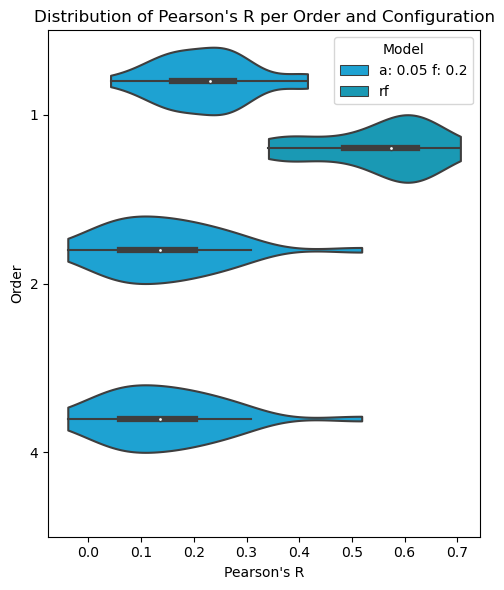

In [42]:
plt.rcParams['figure.figsize']=(5,6)
plt.rcParams['figure.autolayout'] = True
violin = sns.violinplot(combine, x="pearsonR", y="order", hue="config", orient="h", cut=0, scale="count")
# plt.axvline(0.49, 0, c="#6D2077")
# plt.axvline(0.52, 0, c="#6D2077")
# plt.axvline(combine.pearsonR.mean(), 0, c="#6D2077")
violin.set_title("Distribution of Pearson's R per Order and Configuration")
violin.set(xlabel="Pearson's R", ylabel="Order")
plt.legend(title='Model')
# violin.set_yticks(range(5))
# violin.set_yticklabels([f'Alpha: 0.05 \nFilter: 0 \nn = {n[3*2]}', f'Alpha: 0.05 \nFilter: 0.5 \nn = {n[3*3]}', f'Alpha: 0.01 \nFilter: 0 \nn = {n[3*0]}', f'Alpha: 0.01 \nFilter: 0.5 \nn = {n[3*1]}', f'Random Forest \nn = {len(rf.order)}'])

# y_pos = [2,3,0,1]
# for i in range(4):
#     violin.text(0.75, y_pos[i]+0.2, f'n = {n[3*i]} \n \nn = {n[3*i+1]} \n \nn = {n[3*i+2]}')
# violin.text(0.75, 4-0.4, f'n = {len(rf.order)}')
# violin.text(-0.025, 4+0.4, f'ProCan mean values')
# plt.savefig('img/personR.png') #
plt.show()

In [46]:
pearsonR = pd.pivot_table(combine, values = 'pearsonR', index=['drug','config'], columns=["order"])

In [47]:
n = pearsonR.count()
n

order
1    62
2    31
4    31
dtype: int64

In [48]:
pearsonR

order                                1         2         4
drug          config                                      
CHEMBL109480  a: 0.05 f: 0.2  0.282587  0.161242  0.161242
              rf              0.348900       NaN       NaN
CHEMBL1173655 a: 0.05 f: 0.2  0.156340 -0.039259 -0.039259
              rf              0.588592       NaN       NaN
CHEMBL1201182 a: 0.05 f: 0.2  0.299563  0.042330  0.042330
...                                ...       ...       ...
CHEMBL92      rf              0.626581       NaN       NaN
CHEMBL939     a: 0.05 f: 0.2  0.159542  0.159574  0.159574
              rf              0.443473       NaN       NaN
CHEMBL98      a: 0.05 f: 0.2  0.411961  0.261133  0.261133
              rf              0.385158       NaN       NaN

[62 rows x 3 columns]

In [49]:
improve = pearsonR[pearsonR.iloc[:,0] < pearsonR.iloc[:,1]]
improve

,order,1,2,4
drug,config,,,
CHEMBL1614701,a: 0.05 f: 0.2,0.123219,0.295722,0.295722
CHEMBL202721,a: 0.05 f: 0.2,0.246459,0.308902,0.308902
CHEMBL2103875,a: 0.05 f: 0.2,0.415522,0.518436,0.518436
CHEMBL34259,a: 0.05 f: 0.2,0.098580,0.152695,0.152695
CHEMBL413,a: 0.05 f: 0.2,0.263718,0.265698,0.265698
CHEMBL428647,a: 0.05 f: 0.2,0.184124,0.186388,0.186388
CHEMBL553025,a: 0.05 f: 0.2,0.237074,0.239192,0.239192
CHEMBL603469,a: 0.05 f: 0.2,0.041914,0.110328,0.110328
CHEMBL939,a: 0.05 f: 0.2,0.159542,0.159574,0.159574


In [50]:
drugs = [x[0] for x in improve.index.to_flat_index()]

In [51]:
len(set(drugs))

9